# PaddleHub新人培训实践作业

### ACG AI产品业务部PM 叶尔那尔

#### 作业内容及说明：

##### 题目1（必做）：查看项目中Paddle、PaddleHub版本及模型信息（20分）
##### 题目2 （必做） ：完成1个一键预测任务（20分）
##### 题目3 （必做） ：完成1个迁移学习任务（30分）
##### 题目4 （必做） ：完成1个demo服务化部署任务（30分）
##### 题目5 （选做） ：完成一个AI创意项目，主题不限制，应用hub+能力（40分）

## 作业一：查看Paddle和Paddlehub版本及模型信息

In [ ]:
#!pip list    快速查看包版本
!pip list

Package                Version
---------------------- ---------------
absl-py                0.8.1
alembic                1.7.7
anyio                  3.5.0
argcomplete            2.0.0
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
aspy.yaml              1.3.0
astor                  0.8.1
astroid                2.4.1
async-generator        1.10
attrs                  21.4.0
audioread              2.1.8
autopep8               1.6.0
Babel                  2.9.1
backcall               0.1.0
bce-python-sdk         0.8.53
beautifulsoup4         4.10.0
bleach                 4.1.0
cachetools             4.0.0
certifi                2021.10.8
certipy                0.1.3
cffi                   1.15.0
cfgv                   2.0.1
chardet                3.0.4
charset-normalizer     2.0.12
Click                  7.0
cloudpickle            1.6.0
cma                    2.7.0
colorama               0.4.4
colorlog               4.1.0
cryptography           36.0.2
cycler                

In [ ]:
import paddle
import paddlehub as hub
print("Paddle版本")
!pip show paddlepaddle  #方法一
print("Paddle版本")
!paddle --version       #方法二
print("Paddle版本")
print(paddle.__version__)  #方法三

Paddle版本
Name: paddlepaddle
Version: 2.2.2
Summary: Parallel Distributed Deep Learning
Home-page: UNKNOWN
Author: 
Author-email: Paddle-better@baidu.com
License: Apache Software License
Location: /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages
Requires: astor, decorator, numpy, Pillow, protobuf, requests, six
Required-by: 
Paddle版本
PaddlePaddle 2.2.2, compiled with
    with_avx: ON
    with_gpu: OFF
    with_mkl: ON
    with_mkldnn: ON
    with_python: ON
Paddle版本
2.2.2


In [ ]:
!pip install --upgrade paddlehub -i https://pypi.tuna.tsinghua.edu.cn/simple
print("Paddle版本")
!pip show paddlehub

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/1e/86/7184a1c76a3ca9bb47cbf838df6479164c21849da751452b5d11eea4140d/paddlehub-2.2.0-py3-none-any.whl (212 kB)
  Attempting uninstall: paddlehub
    Found existing installation: paddlehub 2.0.0
    Uninstalling paddlehub-2.0.0:
      Successfully uninstalled paddlehub-2.0.0
Paddle版本
Name: paddlehub
Version: 2.2.0
Summary: A toolkit for managing pretrained models of PaddlePaddle and helping user getting started with transfer learning more efficiently.
Home-page: https://github.com/PaddlePaddle/PaddleHub
Author: PaddlePaddle Author
Author-email: UNKNOWN
License: Apache 2.0
Location: /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages
Requires: colorama, colorlog, easydict, filelock, flask, gunicorn, matplotlib, numpy, opencv-python, packaging, paddle2onnx, paddlenlp, Pillow, pyyaml, pyzmq, rarfile, tqdm, visualdl
Required-by: 


In [ ]:
# https://www.paddlepaddle.org.cn/hublist。模型信息可查看官网
print("Paddlehub已下载模型信息")  #导入模型后显示如下
!hub list

Paddlehub已下载模型信息
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
+-------------------------+--------------------------------------------------+
|       ModuleName        |Path                                              |
+-------------------------+--------------------------------------------------+
|     vgg16_imagenet      |/home/aistudio/.paddlehub/modules/vgg16_imagenet  |
+-------------------------+--------------------------------------------------+
|  resnet_v2_50_imagenet  |/home/aistudio/.paddlehub/modules/resnet_v2_50_ima|
|                         |genet                                             |
+-------------------------+--------------------------------------------------+
| ssd_mobilenet_v1_pascal |/home/aistudio/.paddlehub/modules/ssd_mobilenet_v1|
|                         |_pascal        

##  作业二： 一键预测任务
命令行工具

PaddleHub 借鉴了 Anaconda 和 PIP 等软件包管理的理念，开发了命令行工具，可以方便快捷的完成模型的搜索、下载、安装、预测等功能，对应的关键的命令分别是 search，download，install，run 等。我们以 run 命令为例，介绍如何通过命令行工具进行预测。

Run 命令用于执行 Module 的预测，这里分别举一个 NLP 和 CV 的例子。

In [ ]:
# 使用百度LAC进行分词 
!hub run lac --input_text "今天我们一起去学习吧"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2022-03-29 22:05:56,003] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
W0329 22:05:56.055018  4874 analysis_predictor.cc:1350] Deprecated. Please use CreatePredictor instead.
E0329 22:05:56.084372  4874 analysis_config.cc:91] Please compile with gpu to EnableGpu()
[{'word': ['今天', '我们', '一起去', '学习', '吧'], 'tag': ['TIME', 'r', 'v', 'v', 'xc']}]


In [ ]:
# 使用百度Senta情感分析模型对句子进行预测
!hub run senta_bilstm --input_text "祝福你们，别一毕业就远走高飞了，想着点我们"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2022-03-29 22:06:00,047] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
W0329 22:06:01.633112  4891 analysis_predictor.cc:1350] Deprecated. Please use CreatePredictor instead.
E0329 22:06:02.202898  4891 analysis_config.cc:91] Please compile with gpu to EnableGpu()
[2022-03-29 22:06:02,835] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
E0329 22:06:02.892114  4891 analysis_config.cc:91] Please compile with gpu to EnableGpu()
[{'text': '祝福你们，别一毕业就远走高飞了，想着点我们', 'sentiment_label': 1, 'sentiment_key': 'positive', 'positive_probs': 0.8535, 'negative_probs': 0.1465}]


In [ ]:
# 使用resnet-50做图像识别
!hub run resnet_v2_50_imagenet --input_path 6.jpeg

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2022-03-29 22:06:07,680] [    INFO] - 267 pretrained paramaters loaded by PaddleHub
[[{'snail': 0.9997523427009583}]]


In [ ]:
# 使用SSD检测模型对图片进行目标检测，第一条命令是下载图片，第二条命令是执行预测
!wget --no-check-certificate https://paddlehub.bj.bcebos.com/resources/test_img_bird.jpg
!hub run ssd_mobilenet_v1_pascal --input_path test_img_bird.jpg

--2022-03-29 22:06:09--  https://paddlehub.bj.bcebos.com/resources/test_img_bird.jpg
Resolving paddlehub.bj.bcebos.com (paddlehub.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddlehub.bj.bcebos.com (paddlehub.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13376 (13K) [image/jpeg]
Saving to: ‘test_img_bird.jpg.2’

test_img_bird.jpg.2 100%[===================>]  13.06K  --.-KB/s    in 0.006s  

2022-03-29 22:06:09 (1.99 MB/s) - ‘test_img_bird.jpg.2’ saved [13376/13376]

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2022-03-29 22:06:12,045] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
W0329 22:06:12.


## 作业二： 一键预测任务（批量数据）

PaddleHub提供了两种动物识别模型：

* [resnet50_vd_animals](https://paddlepaddle.org.cn/hubdetail?name=resnet50_vd_animals&en_category=ImageClassification): ResNet-vd 其实就是 ResNet-D，是ResNet 原始结构的变种，可用于图像分类和特征提取。该 PaddleHub Module 采用百度自建动物数据集训练得到，支持7978种动物的分类识别。

* [mobilenet_v2_animals](https://paddlepaddle.org.cn/hubdetail?name=mobilenet_v2_animals&en_category=ImageClassification): MobileNet V2 是一个轻量化的卷积神经网络，它在 MobileNet 的基础上，做了 Inverted Residuals 和 Linear bottlenecks 这两大改进。该 PaddleHub Module 是在百度自建动物数据集上训练得到的，可用于图像分类和特征提取，当前已支持7978种动物的分类识别。

### 1、定义待预测数据


以本示例中文件夹下图片为待预测图片。

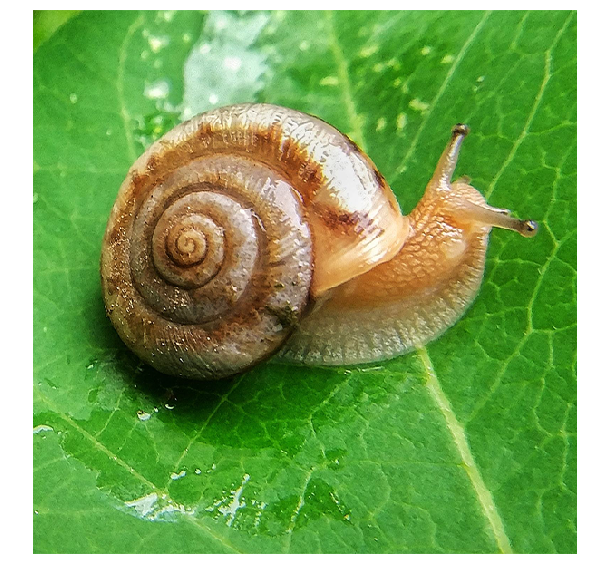

In [ ]:
# 待预测图片
test_img_path = ["./1.jpeg", "./2.jpeg", "./3.jpeg", "./4.jpeg", "./5.jpeg","./6.jpeg"]


import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# 展示图片
img1 = mpimg.imread(test_img_path[5]) 


plt.figure(figsize=(10,10))
plt.imshow(img1) 
 
plt.axis('off') 
plt.show()

In [ ]:
!cat text.txt






6.jpeg

In [ ]:
with open('text.txt', 'r') as f:
    test_img_path=[]
    for line in f:
        test_img_path.append(line.strip())
print(test_img_path)

['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg']


### 2、加载预训练模型

In [ ]:
module = hub.Module(name="resnet50_vd_animals")
module1 = hub.Module(name="mobilenet_v2_animals")


[2022-03-29 22:06:23,243] [    INFO] - Installing resnet50_vd_animals module
[2022-03-29 22:06:23,276] [    INFO] - Module resnet50_vd_animals already installed in /home/aistudio/.paddlehub/modules/resnet50_vd_animals
[2022-03-29 22:06:23,276] [    INFO] - Module resnet50_vd_animals already installed in /home/aistudio/.paddlehub/modules/resnet50_vd_animals
E0329 22:06:23.600680  3721 analysis_config.cc:91] Please compile with gpu to EnableGpu()
[2022-03-29 22:06:23,894] [    INFO] - Installing mobilenet_v2_animals module
[2022-03-29 22:06:23,894] [    INFO] - Installing mobilenet_v2_animals module
[2022-03-29 22:06:23,930] [    INFO] - Module mobilenet_v2_animals already installed in /home/aistudio/.paddlehub/modules/mobilenet_v2_animals
[2022-03-29 22:06:23,930] [    INFO] - Module mobilenet_v2_animals already installed in /home/aistudio/.paddlehub/modules/mobilenet_v2_animals
[2022-03-29 22:06:23,930] [    INFO] - Module mobilenet_v2_animals already installed in /home/aistudio/.paddl

### 3、预测


PaddleHub对于支持一键预测的module，可以调用module的相应预测API，完成预测功能。

In [ ]:
import cv2
np_images =[cv2.imread(image_path) for image_path in test_img_path]
print("Resnet预测结果")
results = module.classification(images=np_images)

for result in results:
    print(result)
print("mobilenet预测结果")
results1 = module1.classification(images=np_images)

for result in results1:
    print(result)



Resnet预测结果
{'骏马': 0.7609689235687256}
{'八哥犬': 0.9333169460296631}
{'金刚鹦鹉': 0.8545519709587097}
{'海马鱼': 0.6250597834587097}
{'萨能山羊': 0.43781304359436035}
{'扁蜗牛': 0.5485442280769348}
mobilenet预测结果
{'骏马': 0.7494975924491882}
{'八哥犬': 0.9286366701126099}
{'五彩金刚鹦鹉': 0.3602837920188904}
{'海马鱼': 0.37851470708847046}
{'萨能山羊': 0.6404884457588196}
{'蛞蝓': 0.6318635940551758}


## 作业三： 迁移学习任务

In [5]:
#导入API
import paddlehub.vision.transforms as T
from paddlehub.finetune.trainer import Trainer
from paddlehub.datasets import Flowers
import paddle
import paddlehub as hub
#paddle.set_device('gpu')
# 数据预处理方式
transforms = T.Compose([T.Resize((256, 256)),
                        T.CenterCrop(224),
                        T.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])],
                        to_rgb=True)


# 获取并处理数据集
flowers = Flowers(transforms)

flowers_validate = Flowers(transforms, mode='val')
# 加载(将被训练的)预训练模型
model = hub.Module(name="resnet50_vd_imagenet_ssld", label_list=["roses", "tulips", "daisy", "sunflowers", "dandelion"])

# 设置优化策略、运行配置、训练模型
optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
trainer = Trainer(model, optimizer, checkpoint_dir='img_classification_ckpt')

trainer.train(flowers, epochs=10, batch_size=32, eval_dataset=flowers_validate, save_interval=1)
#trainer.train(flowers, epochs=65, batch_size=32, eval_dataset=None, log_interval=10, save_interval=1)
# 模型预测
if __name__ == '__main__':

    model = hub.Module(name='resnet50_vd_imagenet_ssld', label_list=["roses", "tulips", "daisy", "sunflowers", "dandelion"], load_checkpoint='/PATH/TO/CHECKPOINT')
    result = model.predict(['flower.jpg'])

Download https://bj.bcebos.com/paddlehub-dataset/flower_photos.tar.gz
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmp8xo_rxeh/flower_photos.tar.gz
[##################################################] 100.00%
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/resnet50_vd_imagenet_ssld.tar.gz
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmp5mx0kikc/resnet50_vd_imagenet_ssld.tar.gz
[##################################################] 100.00%


[2022-03-30 15:21:44,031] [    INFO] - Successfully installed resnet50_vd_imagenet_ssld-1.1.0


load pretrained parameters success


[2022-03-30 15:21:45,883] [ WARNING] - PaddleHub model checkpoint not found, start from scratch...
[2022-03-30 15:24:41,898] [   TRAIN] - Epoch=1/10, Step=10/92 loss=1.2431 acc=0.6031 lr=0.001000 step/sec=0.06 | ETA 04:29:53
[2022-03-30 15:27:21,994] [   TRAIN] - Epoch=1/10, Step=20/92 loss=1.1490 acc=0.5906 lr=0.001000 step/sec=0.06 | ETA 04:17:41
[2022-03-30 15:29:57,206] [   TRAIN] - Epoch=1/10, Step=30/92 loss=0.9287 acc=0.6656 lr=0.001000 step/sec=0.06 | ETA 04:11:07
[2022-03-30 15:32:44,030] [   TRAIN] - Epoch=1/10, Step=40/92 loss=0.9203 acc=0.6531 lr=0.001000 step/sec=0.06 | ETA 04:12:17
[2022-03-30 15:35:20,675] [   TRAIN] - Epoch=1/10, Step=50/92 loss=0.9208 acc=0.6469 lr=0.001000 step/sec=0.06 | ETA 04:09:52
[2022-03-30 15:37:55,311] [   TRAIN] - Epoch=1/10, Step=60/92 loss=0.8415 acc=0.6531 lr=0.001000 step/sec=0.06 | ETA 04:07:44
[2022-03-30 15:40:28,600] [   TRAIN] - Epoch=1/10, Step=70/92 loss=0.7916 acc=0.7094 lr=0.001000 step/sec=0.07 | ETA 04:05:55
[2022-03-30 15:43:0

## 作业四： 模型部署

In [ ]:
!hub serving start -m resnet50_vd_animals

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is depreca

In [ ]:
import requests
import json
import cv2
import base64

def cv2_to_base64(image):
    data = cv2.imencode('.jpg', image)[1]
    return base64.b64encode(data.tostring()).decode('utf8')


# 发送HTTP请求
data = {'images':[cv2_to_base64(cv2.imread('./2.jpeg'))]}
headers = {"Content-type": "application/json"}
url = "http://127.0.0.1:8866/predict/resnet50_vd_animals"
r = requests.post(url=url, headers=headers, data=json.dumps(data))

# 打印预测结果
print(r.json()["results"])